In [83]:
import sqlite3
import pandas as pd

# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

#Table Creations
# Create manufacturer table
cursor.execute('''
CREATE TABLE manufacturers (
    manufacturer_id INTEGER PRIMARY KEY,
    name TEXT,
    country TEXT
)
''')

# Create cars table with foreign key
cursor.execute('''
CREATE TABLE cars (
    car_id INTEGER PRIMARY KEY,
    model TEXT,
    year INTEGER,
    horsepower INTEGER,
    manufacturer_id INTEGER,
    FOREIGN KEY (manufacturer_id) REFERENCES manufacturers(manufacturer_id)
)
''')


In [84]:
# Insert data into manufacturers
# Addind data cause its easier
cursor.executemany('''
INSERT INTO manufacturers (manufacturer_id, name, country) VALUES (?, ?, ?)
''', [
    (1, 'Ford', 'USA'),
    (2, 'Toyota', 'Japan'),
    (3, 'BMW', 'Germany')
])

# Insert data into cars
cursor.executemany('''
INSERT INTO cars (car_id, model, year, horsepower, manufacturer_id) VALUES (?, ?, ?, ?, ?)
''', [
    (1, 'Mustang', 2020, 450, 1),
    (2, 'Corolla', 2019, 132, 2),
    (3, 'Camry', 2021, 203, 2),
    (4, 'M3', 2022, 473, 3),
    (5, 'Fiesta', 2018, None, 1)  # Includes a NULL horsepower
])


In [85]:
join_query = '''
SELECT cars.model, cars.year, cars.horsepower, manufacturers.name AS manufacturer, manufacturers.country
FROM cars
JOIN manufacturers ON cars.manufacturer_id = manufacturers.manufacturer_id
'''
joined_df = pd.read_sql_query(join_query, conn)
print(joined_df)


     model  year  horsepower manufacturer  country
0  Mustang  2020       450.0         Ford      USA
1  Corolla  2019       132.0       Toyota    Japan
2    Camry  2021       203.0       Toyota    Japan
3       M3  2022       473.0          BMW  Germany
4   Fiesta  2018         NaN         Ford      USA


In [100]:
#Just checking that the join is working proper and query requirment 1 
query1 = pd.read_sql_query('SELECT model, horsepower FROM cars WHERE horsepower > 200', conn)
print(query1)


     model  horsepower
0  Mustang         450
1    Camry         203
2       M3         473
3    Supra         382


In [87]:
#Just checking that the join is working proper and query requirment 2
query2 = pd.read_sql_query('''
SELECT manufacturers.name, COUNT(*) as car_count
FROM cars
JOIN manufacturers ON cars.manufacturer_id = manufacturers.manufacturer_id
GROUP BY manufacturers.name
''', conn)
print(query2)


     name  car_count
0     BMW          1
1    Ford          2
2  Toyota          2


In [88]:
#Dropping Nulls
cursor.execute('DELETE FROM cars WHERE horsepower IS NULL')
conn.commit()


In [102]:
# Cross checking for Nulls
nulls_query = '''
SELECT * FROM cars
WHERE horsepower IS NULL
'''

# Run the query and store the result
null_rows = pd.read_sql_query(nulls_query, conn)

# Display the result
print(null_rows)

Empty DataFrame
Columns: [car_id, model, year, horsepower, manufacturer_id]
Index: []


In [89]:
#Adding Row
cursor.execute('''
INSERT INTO cars (car_id, model, year, horsepower, manufacturer_id)
VALUES (?, ?, ?, ?, ?)
''', (6, 'Supra', 2023, 382, 2))
conn.commit()


In [104]:
# checking if row is added
supra_query = '''
SELECT cars.car_id, cars.model, cars.year, cars.horsepower, 
       manufacturers.name AS manufacturer, manufacturers.country
FROM cars
JOIN manufacturers ON cars.manufacturer_id = manufacturers.manufacturer_id
WHERE cars.model = 'Supra'
'''

# Execute the query and load into a DataFrame
supra_row = pd.read_sql_query(supra_query, conn)

# Display the result
print(supra_row)

   car_id  model  year  horsepower manufacturer country
0       6  Supra  2023         382       Toyota   Japan


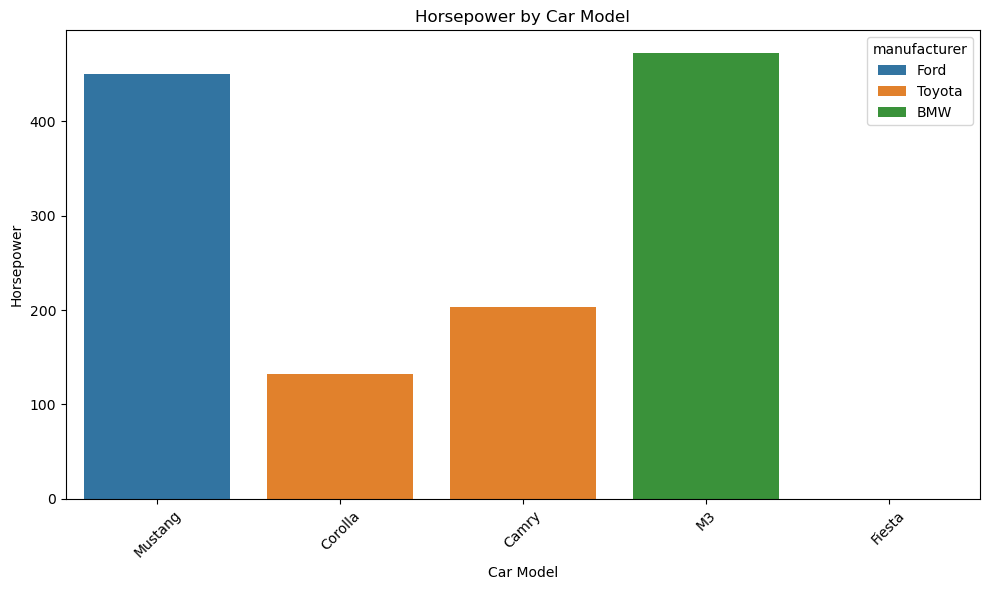

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=joined_df, x='model', y='horsepower', hue='manufacturer')
plt.title('Horsepower by Car Model')
plt.ylabel('Horsepower')
plt.xlabel('Car Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()